<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-1/blob/main/Parcial_1_Se%C3%B1ales_y_Sistemas_2024_1_Jparraar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solución del punto #2 del parcial de Señales y Sistemas 2024_1_JUAN LEANDRO PARRA ARIAS_1002653993

 Cual es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuncia de muestreo de 5KHz, aplicado a la señal continua x(t)= 3cos(1000πt) + 5sen(2000πt) + 10cos(11000πt). Realizar la simulación delmproceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

El código diseñado a continuacion es una representación gráfica  de una señal continua x(t)  y de como su versión discreta x[n] puede ser muestreada, así mismo se determina que la primera frecuencia de muestreo no cumple Nyquist, es por ello  que se procede a realizar el analisis visto en las hojas del pdf escrito del mismo punto en cuestión, y por ende se toma una frecuencia de muestreo de tal manera que se cumpla con los requerimientos solicitados, teniendo como resultado la tercera y cuarta gráfica, implementando así un conversor adecuado para la señal estudiada.

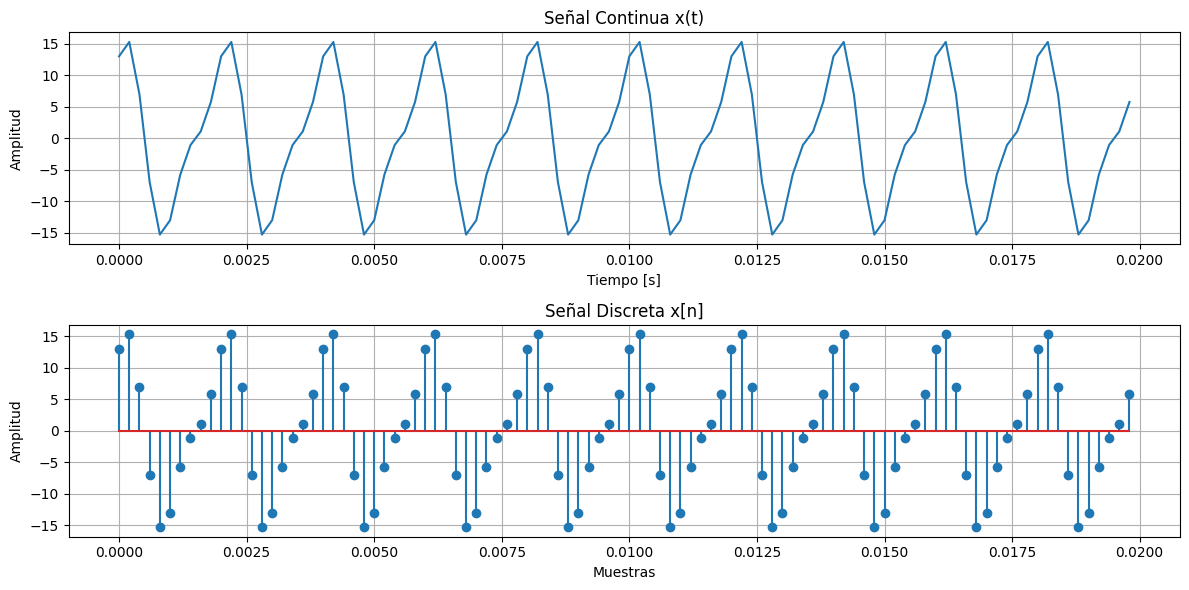

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua x(t)
def x(t):
    return 3 * np.cos(1000*np.pi*t) + 5 * np.sin(2000*np.pi*t) + 10 * np.cos(11000*np.pi*t)

# Frecuencia de muestreo
fs = 5000  # 5 kHz

# Duración de la señal continua
duración = 0.02  # 20 ms

# Crear el eje de tiempo para la señal continua
t_continuo = np.arange(0, duración, 1/fs)

# Muestrear la señal continua
x_discreto = x(t_continuo)

# Crear el eje de tiempo para la señal discreta
t_discreto = np.arange(0, duración, 1/fs)

# Graficar la señal continua y la señal discreta
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_continuo, x(t_continuo))
plt.title('Señal Continua x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(t_discreto, x_discreto)
plt.title('Señal Discreta x[n]')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

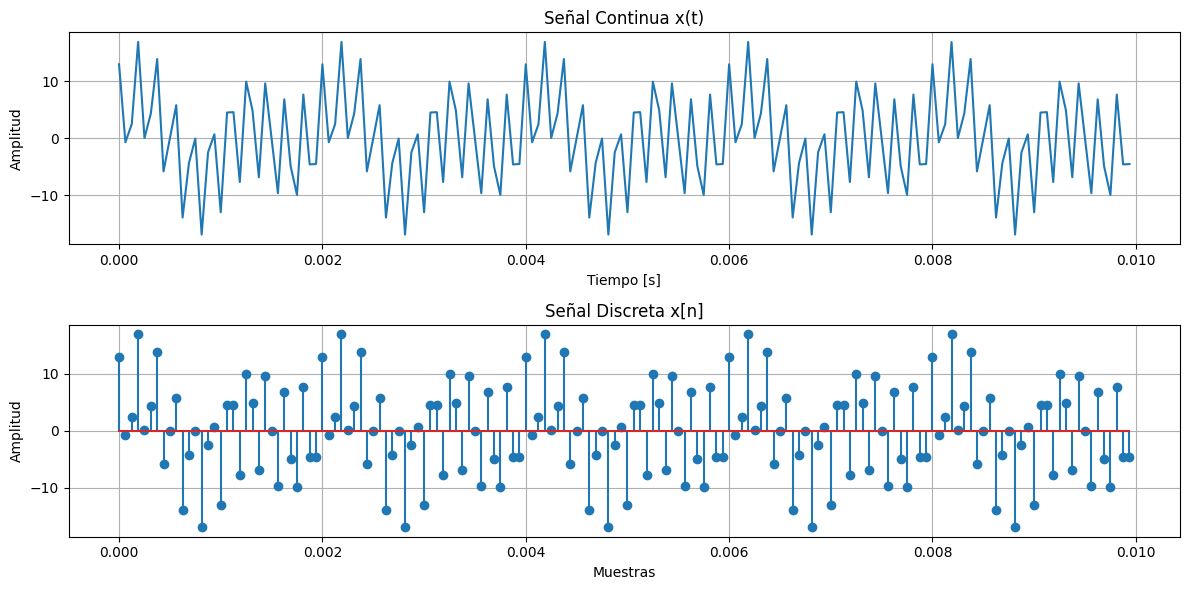

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua x(t)
#Diseño e implementación de un conversor adecuado para la siguiente señal:
def x(t):
    return 3 * np.cos(1000*np.pi*t) + 5 * np.sin(2000*np.pi*t) + 10 * np.cos(11000*np.pi*t)

# Frecuencia de muestreo
fs = 16000  # 16 kHz

# Duración de la señal continua
duracion = 0.01  # 10 ms

# Crear el eje de tiempo para la señal continua
t_continuo = np.arange(0, duracion, 1/fs)

# Muestrear la señal continua
x_discreto = x(t_continuo)

# Crear el eje de tiempo para la señal discreta
t_discreto = np.arange(0, duracion, 1/fs)

# Gráficar la señal continua y la señal discreta
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_continuo, x(t_continuo))
plt.title('Señal Continua x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(t_discreto, x_discreto)
plt.title('Señal Discreta x[n]')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

Solución del punto #3 del parcial de Señales y Sistemas 2024_1

Implemente una simulación para encontrar la salida del sistema lineal e invariante al tiempo H{.}, con respuesta al escalón h∈[n] = {2,4,1,5,0,10},n ∈ Z, ante la entrada análoga en corriente  x(t)= 20(cos(t/3) + cos(t/4))[A].
A: Amperios. Incluya los acondicionamientos necesarios de discretización y cuantización, asumiendo un microprocesador de 4 bits con entrada análoga de 4mA a 20mA.

In [30]:
def my_ceropend(x,xhmax=0.020,xhmin=0.004):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

Para este código se genera una onda cuasiperiodica de dos señales cosenoidales y según bajo criterios de entrada analógica se ajustan valores maximos y minimos de corriente, y se procede a graficar la señal solicitada.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 6*np.pi #periodo señal 1
T2 = 8*np.pi #periodo señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #periodo cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4))
xhmax = 0.020
xhmin = 0.004
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10
#asegurar vector columna

El siguiente código realiza la cunatización de una señal continua trasnformada, utilizando un numero especifico de bits, siendo estos los valores cuantizados. En resumen es una discretización de una señal convertida de continua a una version discreta.

In [32]:
#cuantizar
nbits = 4 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


<ipython-input-32-1e38425e4ccf>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


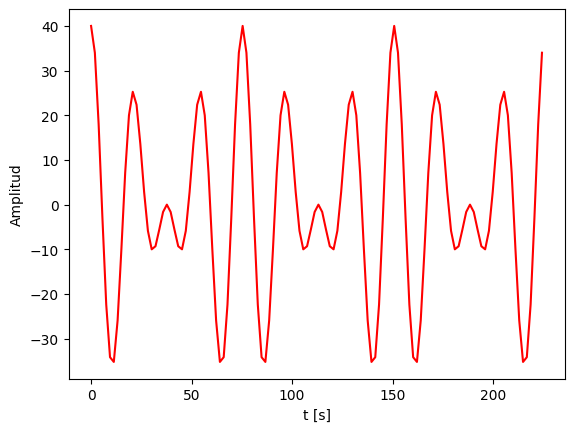

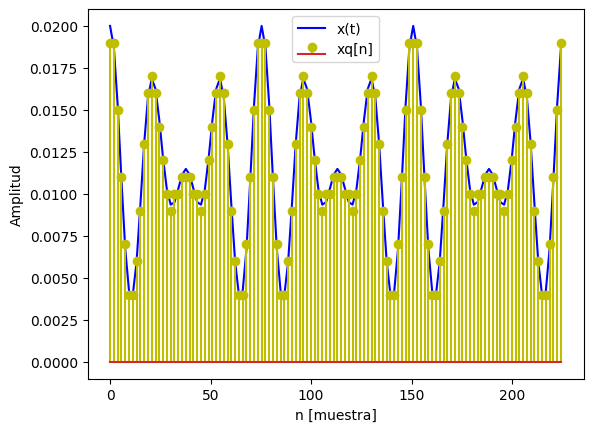

In [33]:
#gráficas de señales
plt.plot(t,x,'r',label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='x(t)')
plt.stem(t,xq,'y',label='xq[n]')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

El código anterior toma como la  respuesta escalón de un sistema discreto y calcula la respuesta impulso del mismo, utilizando la diferencia entre elementos sucesivos de la respuesta escalón siendo esto equivalente a calcular la respuesta impulso como la derivada discreta de la respuesta escalón.

In [34]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit
print(h)

[ 2 -3  4 -5 10]


Se realiza una convolución de laas dos señales discretas Xq y h y se procede a graficarlas, quedando lo siguiente:

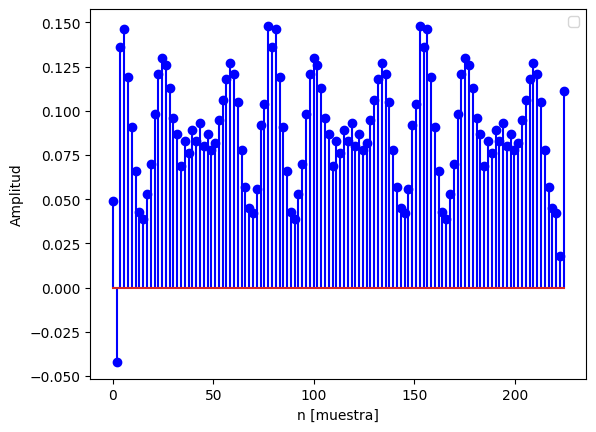

In [35]:
y = np.convolve(xq,h,mode='same')#respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.stem(t,y,'b',label='')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()